# Clustering Techniques on the Iris Dataset
## Objective
This project focuses on applying clustering techniques to the Iris dataset to evaluate different unsupervised learning approaches.
## Dataset
The Iris dataset, available in the sklearn library, consists of numerical features representing different species of flowers. Since clustering is an unsupervised task, the species column is excluded from the analysis.

In [131]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

In [133]:
# Load the Iris dataset
data = load_iris()

# Create a DataFrame from the dataset
x=data.data
feature=data.feature_names
df = pd.DataFrame(x,columns = feature)


In [137]:
# Drop the species column (target) since this is a clustering problem
print("Dataset without target:")
print(df.head())

Dataset without target:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


##  1) KMeans Clustering 
#### Description of KMeans Clustering:
- KMeans is an iterative algorithm that partitions a dataset into k clusters.
- It works by:
    - Randomly initializing k cluster centroids.
    - Assigning data points to the nearest centroid.
    - Recalculating centroids based on the mean position of data points in each cluster.
    - Repeating this process until centroids stabilize or maximum iterations are reached.
#### Why KMeans is suitable for the Iris dataset?
- The Iris dataset contains numeric features, and KMeans works well with continuous numerical data.
- It assumes spherical clusters, which aligns with the separable nature of some Iris classes.
#### Implementation and Visualization:

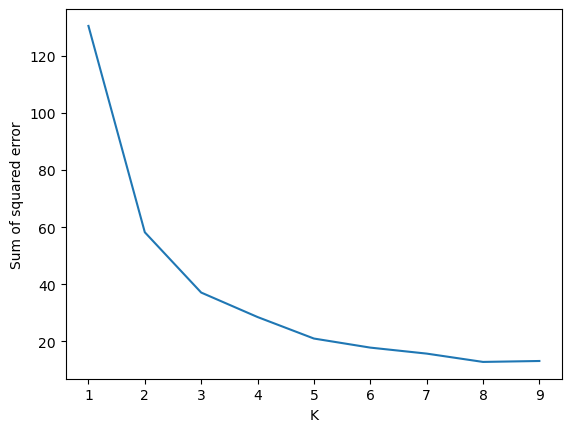

In [140]:
# Plot the Elbow Method results
sse = []  #WCSS
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['sepal length (cm)','sepal width (cm)']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  
Cluster Centers:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.3885

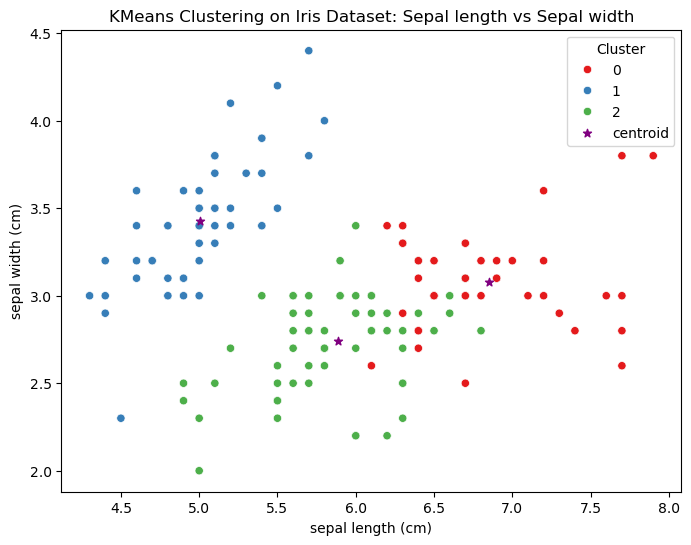

In [107]:
# From the Elbow plot, select k=3 and apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(df)

# Print cluster labels
print(y_pred)

# Add cluster labels to the dataframe
df['cluster'] = y_pred

# View the dataframe with the cluster column
print(df.head())

# Display the cluster centroids
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Visualize the clusters using the first two features
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['sepal length (cm)'], y=df['sepal width (cm)'], hue=df['cluster'], palette='Set1')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.title("KMeans Clustering on Iris Dataset: Sepal length vs Sepal width")
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend(title="Cluster")
plt.show()


##  2) Hierarchical Clustering 
#### Description of Hierarchical Clustering:
- Hierarchical clustering builds a tree-like structure (dendrogram) to group data points.
- Two approaches:
    - Agglomerative: Start with each data point as its own cluster and merge clusters iteratively.
    - Divisive: Start with one cluster containing all points and split iteratively.
- The distance metric (e.g., Euclidean) determines the merging or splitting process.
#### Why Hierarchical Clustering is suitable for the Iris dataset?
- It's effective for small datasets like Iris and provides flexibility with different linkage methods.
- The dendrogram can visually illustrate how data points are grouped, which aids in understanding relationships.
#### Implementation and Visualization:

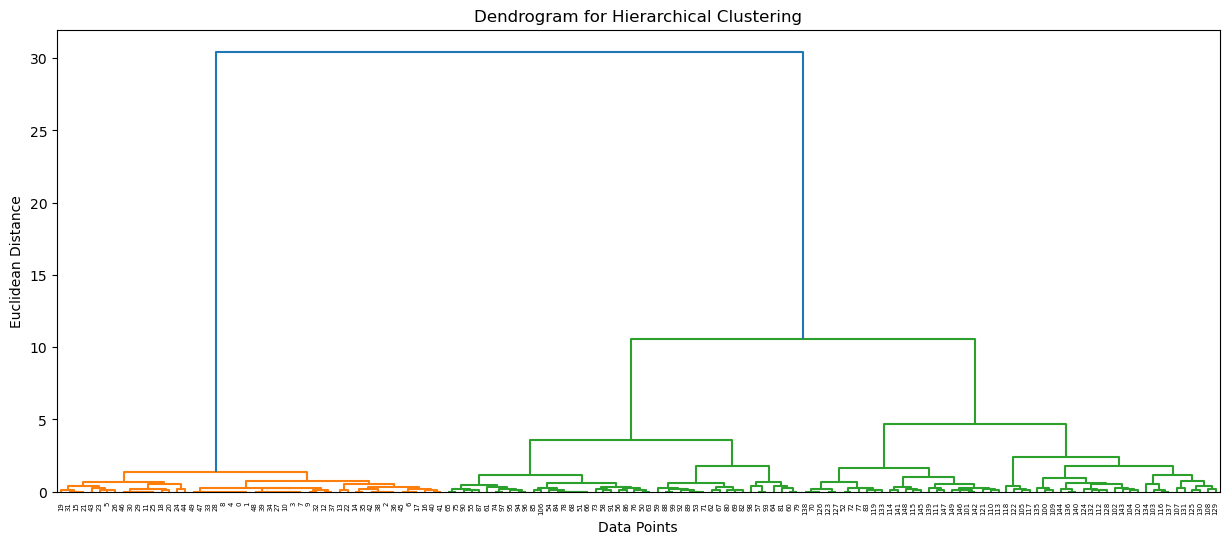

In [71]:
# Selecting two features for visualization (Petal Length & Petal Width)
X = df.iloc[:, [2, 3]].values  

# Step 1: Create Dendrogram to determine optimal number of clusters
plt.figure(figsize=(15, 6))
Z = linkage(X, method='ward')  # 'ward' minimizes variance within clusters
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

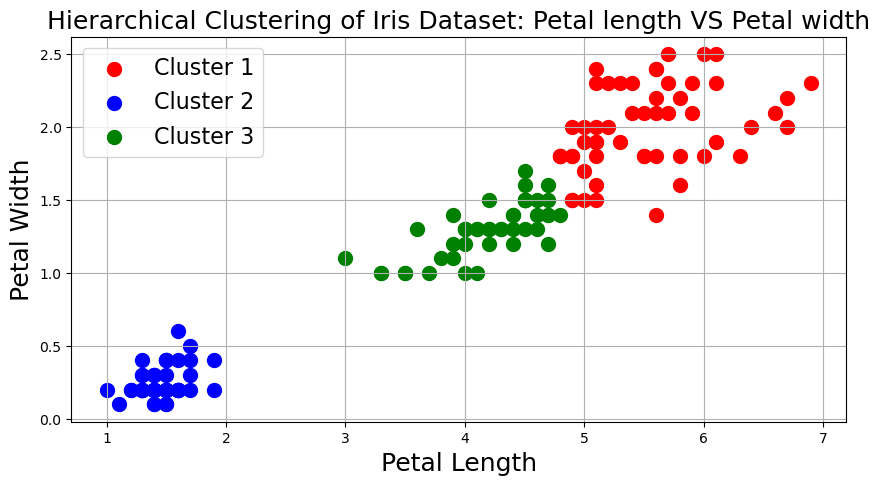

In [123]:
# Step 2: Apply Agglomerative Clustering with 3 clusters
hc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hc = hc.fit_predict(X)

# Step 3: Visualizing the clusters
plt.figure(figsize=(10, 5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1],s=100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1],s=100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1],s=100, c = 'green', label = 'Cluster 3')
plt.title('Hierarchical Clustering of Iris Dataset: Petal length VS Petal width',fontsize =18)
plt.xlabel('Petal Length',fontsize =18)
plt.ylabel('Petal Width',fontsize =18)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()